In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [43]:
df = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [44]:
df['gender'].unique()
df['diet_quality'].unique()
df['parental_education_level'].unique()
df['internet_quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [46]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()
num_cols = df.select_dtypes(include = ['int64','float64']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'student_id']

In [47]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


# **EDA** ----> **UniVariate Analysis**(Distributions)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

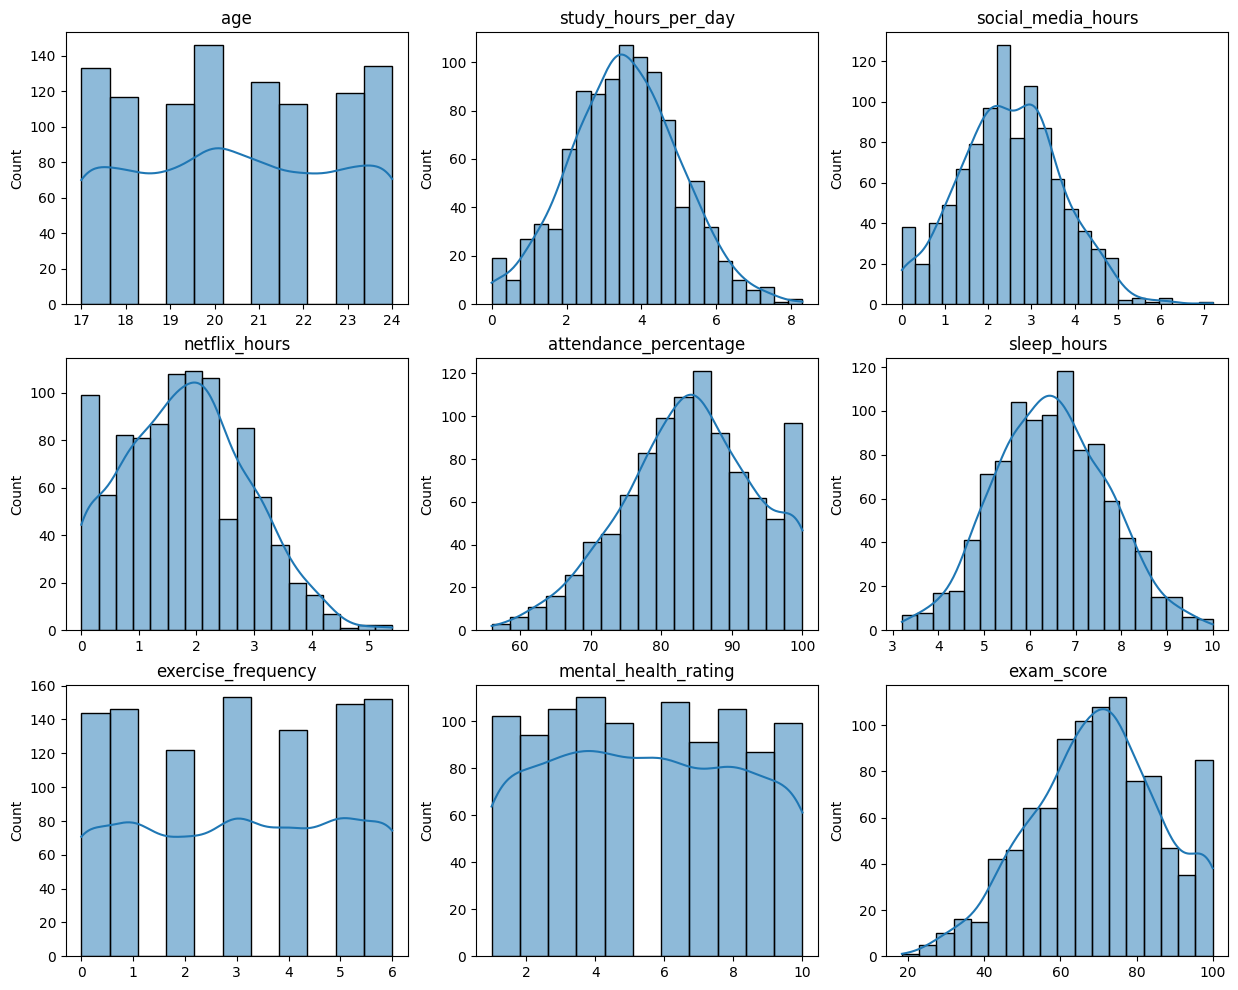

In [48]:
import math
n_cols = 3  
n_total = len(num_cols)
n_rows = math.ceil(n_total / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

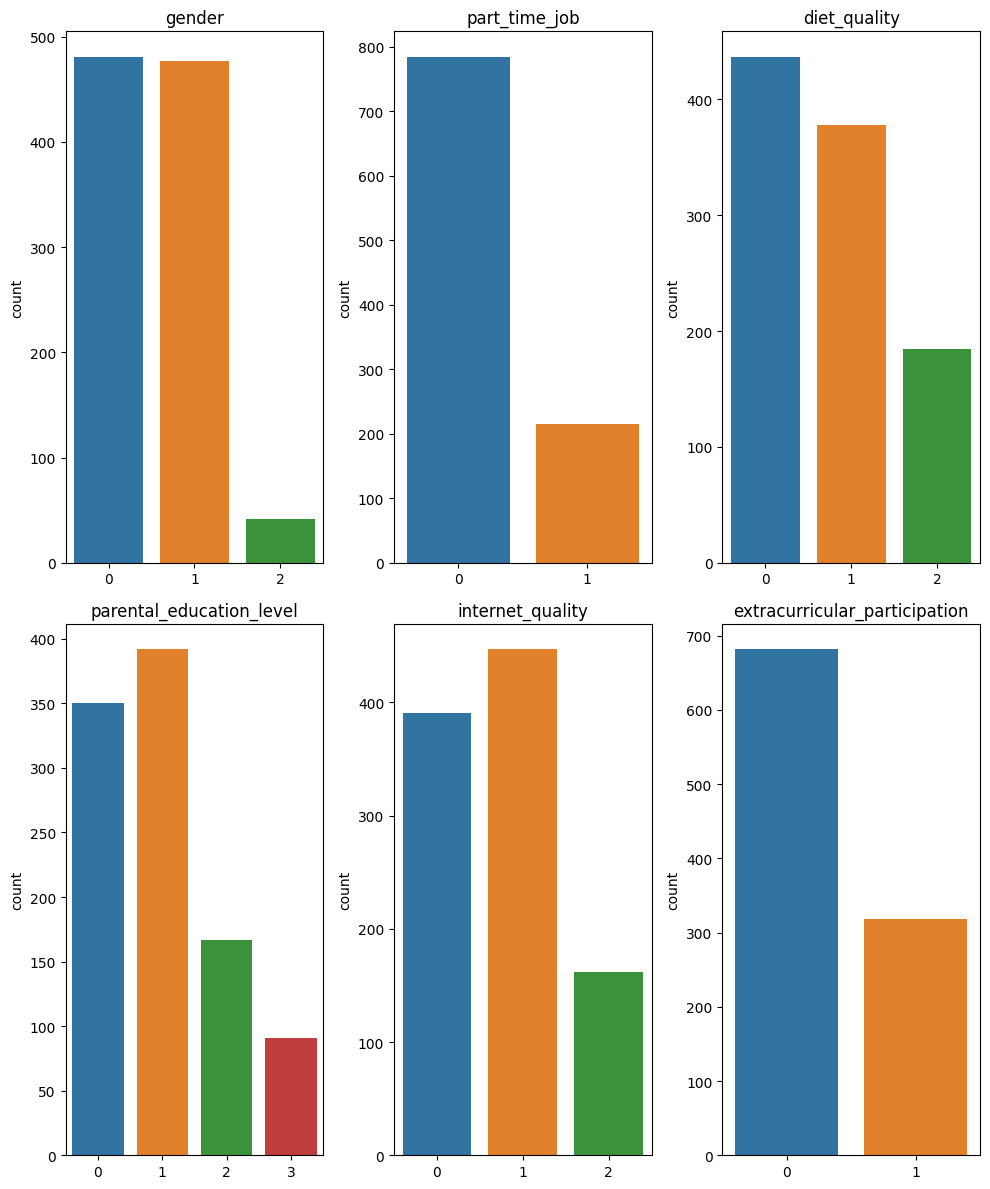

In [50]:
num_plot = len(cat_cols)
col = 3
row = math.ceil(num_plot/col)
fig,axes = plt.subplots(nrows = row,ncols= col,figsize=(5*row,4*col))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

# **Bivariate analysis**

* | Plot Type           | Variables       | Insight Type                      |


* | Scatterplot         | Num vs Num      | Correlation, clusters, trends     |

* | Boxplot             | Cat vs Num      | Group comparison, outliers        |


* | Countplot + Hue     | Cat vs Cat      | Proportional distribution         |


* | Violinplot          | Num vs Cat      | Density & distribution comparison |


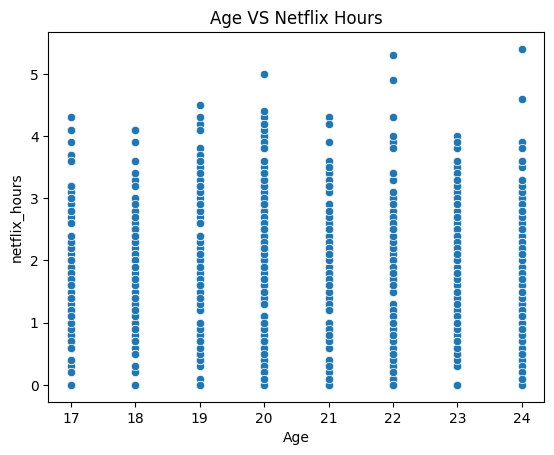

In [51]:
sns.scatterplot(data = df,x = 'age',y = 'netflix_hours')
plt.title('Age VS Netflix Hours')
plt.xlabel('Age')
plt.ylabel('netflix_hours')
plt.show()

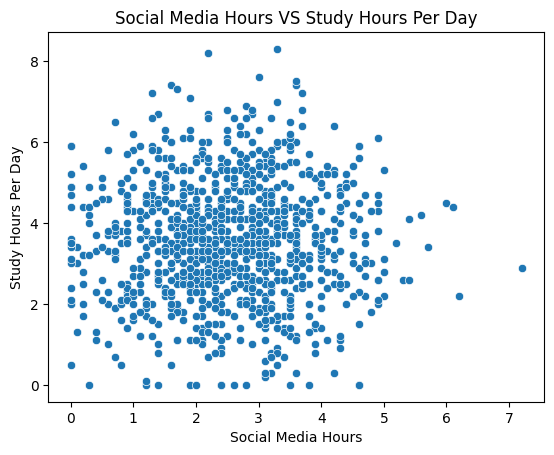

In [52]:
sns.scatterplot(data =df,x = 'social_media_hours',y= 'study_hours_per_day')
plt.title('Social Media Hours VS Study Hours Per Day')
plt.xlabel('Social Media Hours')
plt.ylabel('Study Hours Per Day')
plt.show()

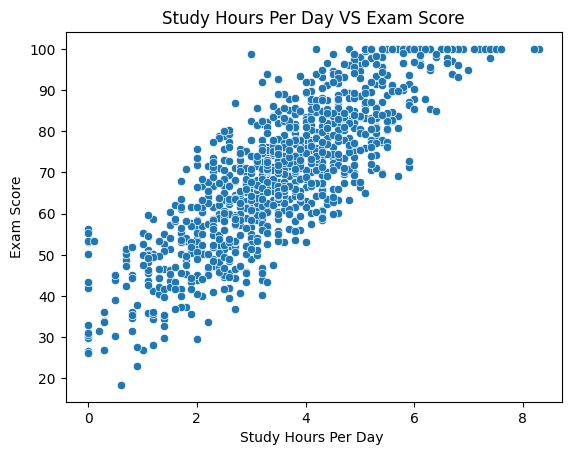

In [53]:
sns.scatterplot(data = df,x = 'study_hours_per_day',y = 'exam_score')
plt.title('Study Hours Per Day VS Exam Score')
plt.xlabel('Study Hours Per Day ')
plt.ylabel('Exam Score')
plt.show()

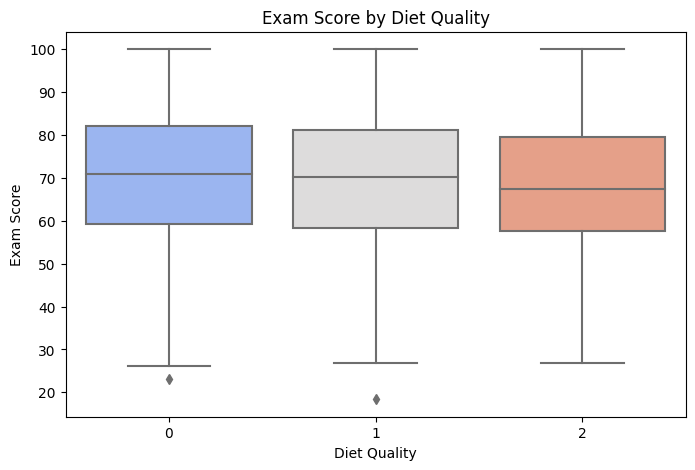

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='diet_quality', y='exam_score', palette='coolwarm')
plt.title("Exam Score by Diet Quality")
plt.xlabel("Diet Quality")
plt.ylabel("Exam Score")
plt.show()

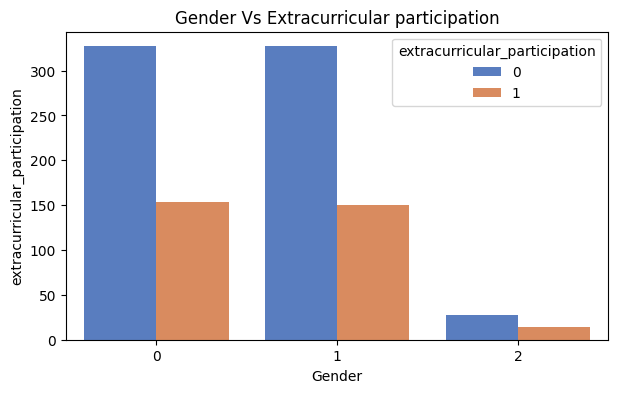

In [55]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='gender', hue='extracurricular_participation', palette='muted')
plt.title("Gender Vs Extracurricular participation")
plt.xlabel("Gender")
plt.ylabel("extracurricular_participation")
plt.show()


In [56]:
df['gender'].value_counts()

gender
0    481
1    477
2     42
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

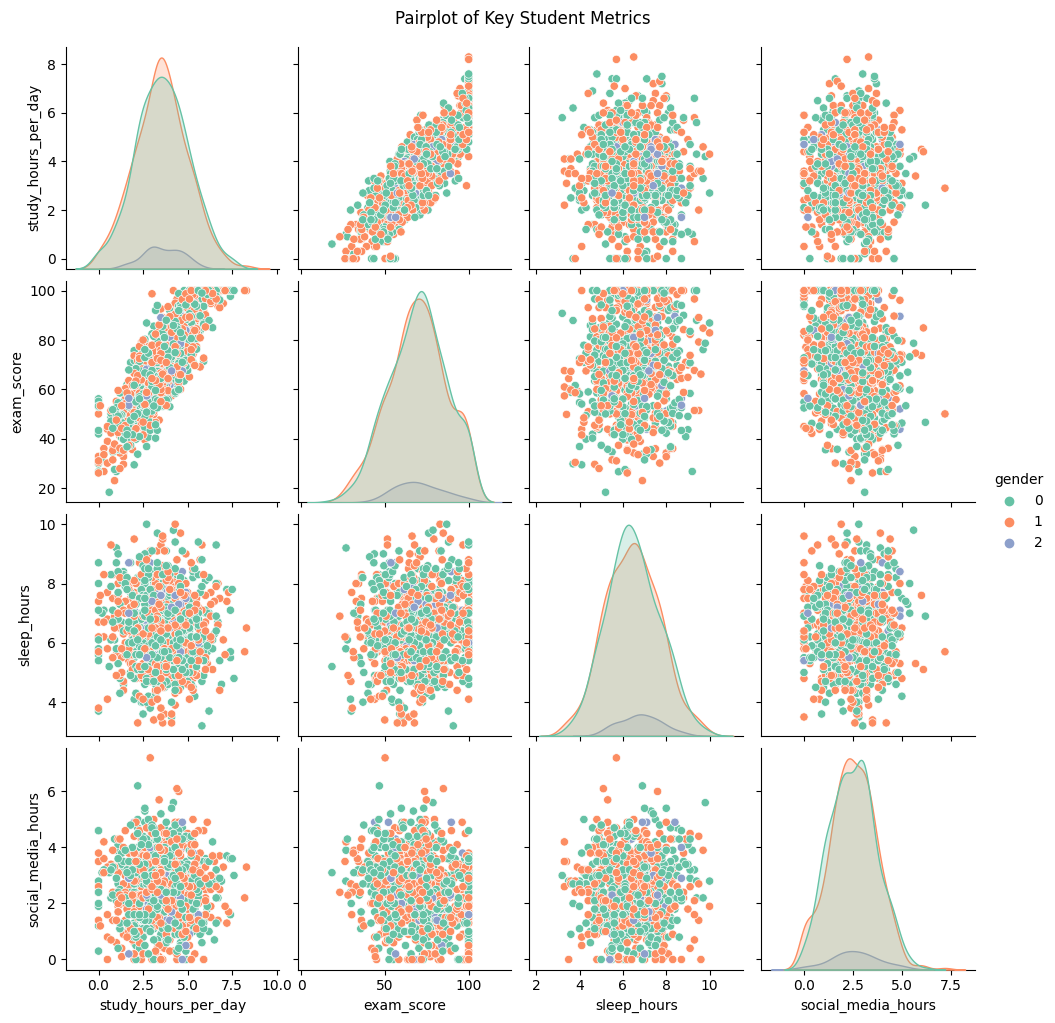

In [57]:
#Pairplots
pair_cols = ['study_hours_per_day', 'exam_score', 'sleep_hours', 'social_media_hours']

sns.pairplot(df[pair_cols + ['gender']], hue='gender', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Key Student Metrics", y=1.02)
plt.show()


<Axes: >

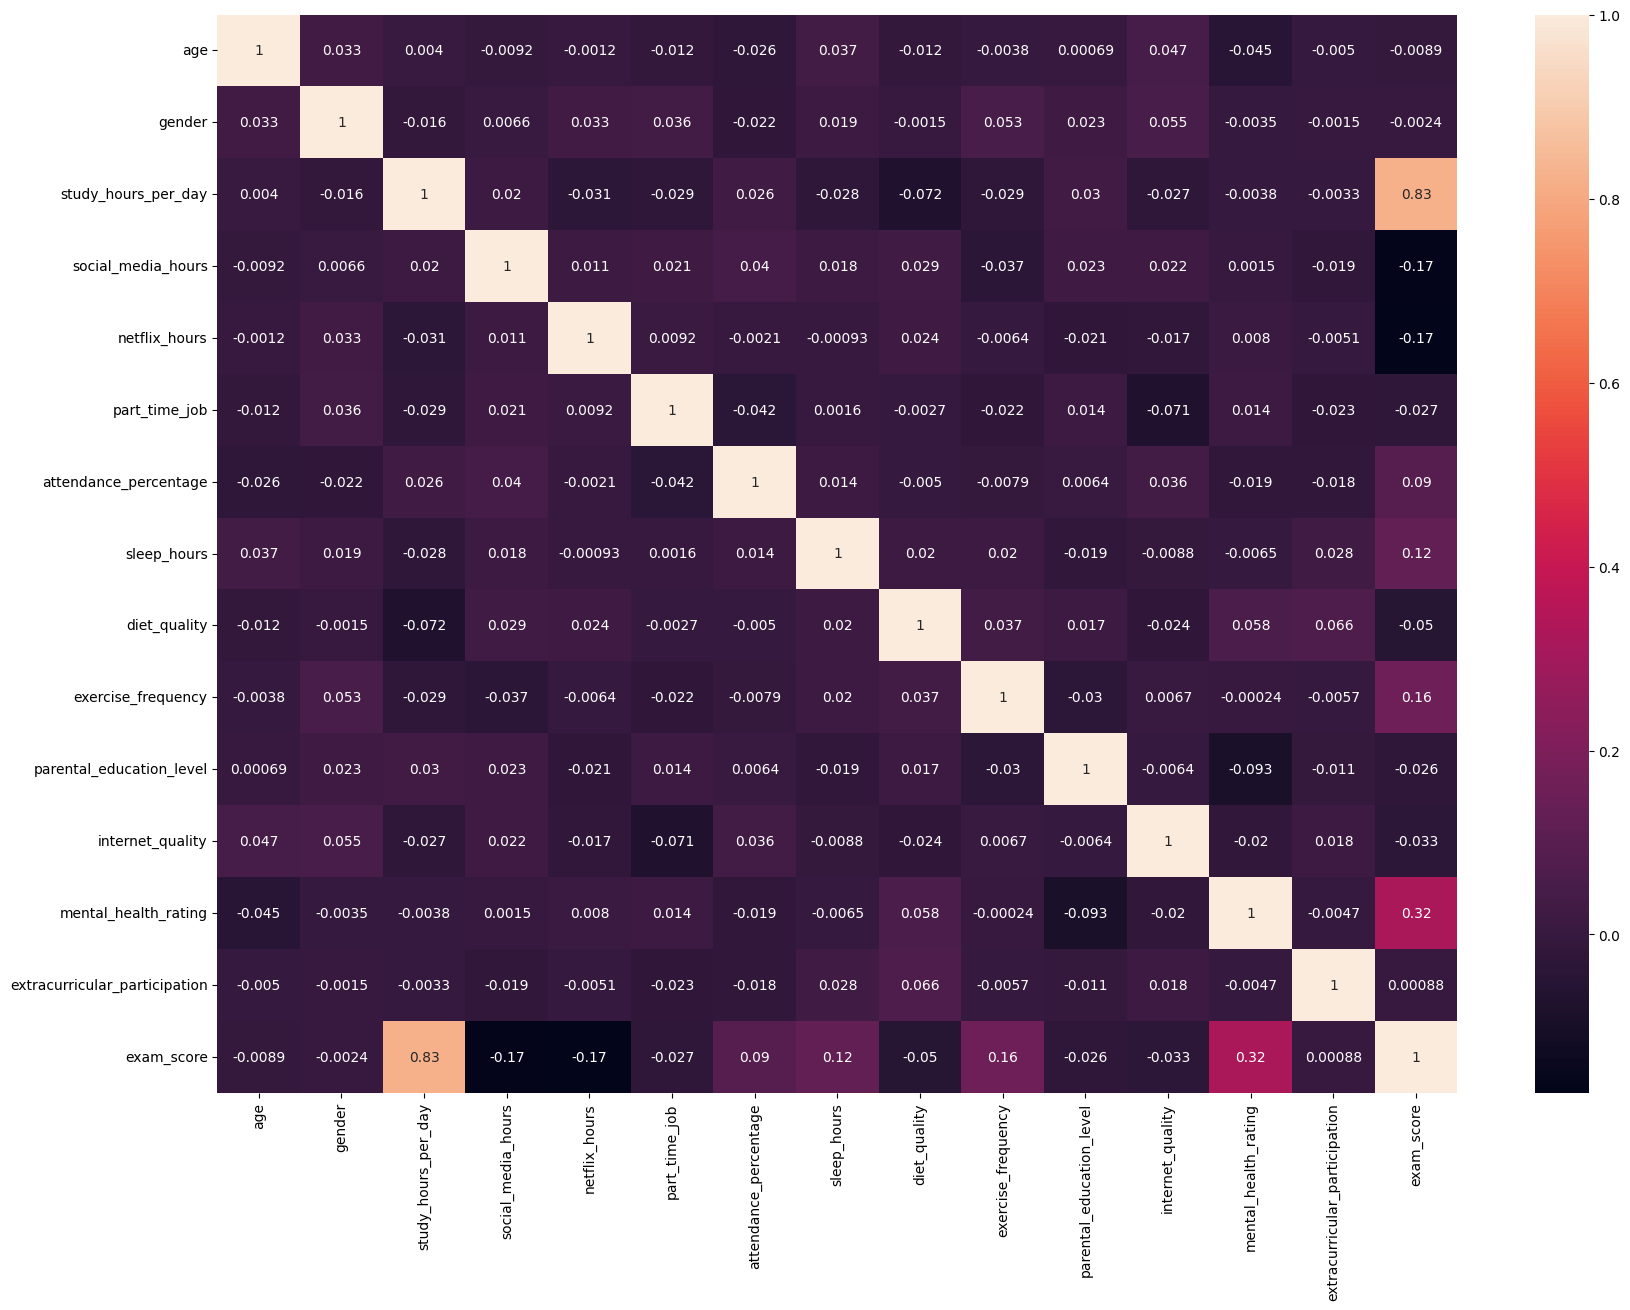

In [58]:
df.drop(columns=['student_id'],inplace =True)
plt.figure(figsize = (20,14))
corr = df.corr()
sns.heatmap(corr, annot=True)

# **MultiVariate Analysis**

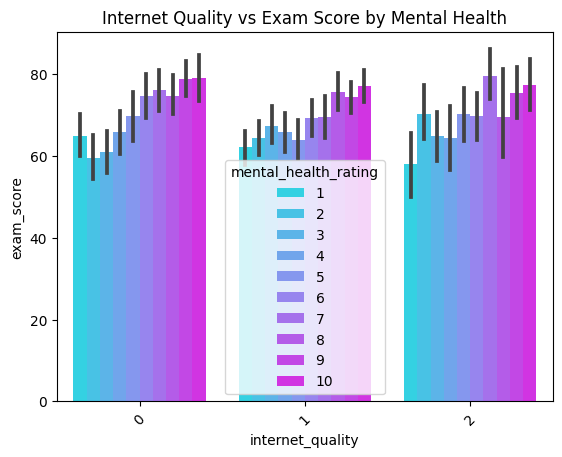

In [59]:
sns.barplot(data=df, x='internet_quality', y='exam_score', hue='mental_health_rating', palette='cool')
plt.title('Internet Quality vs Exam Score by Mental Health')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

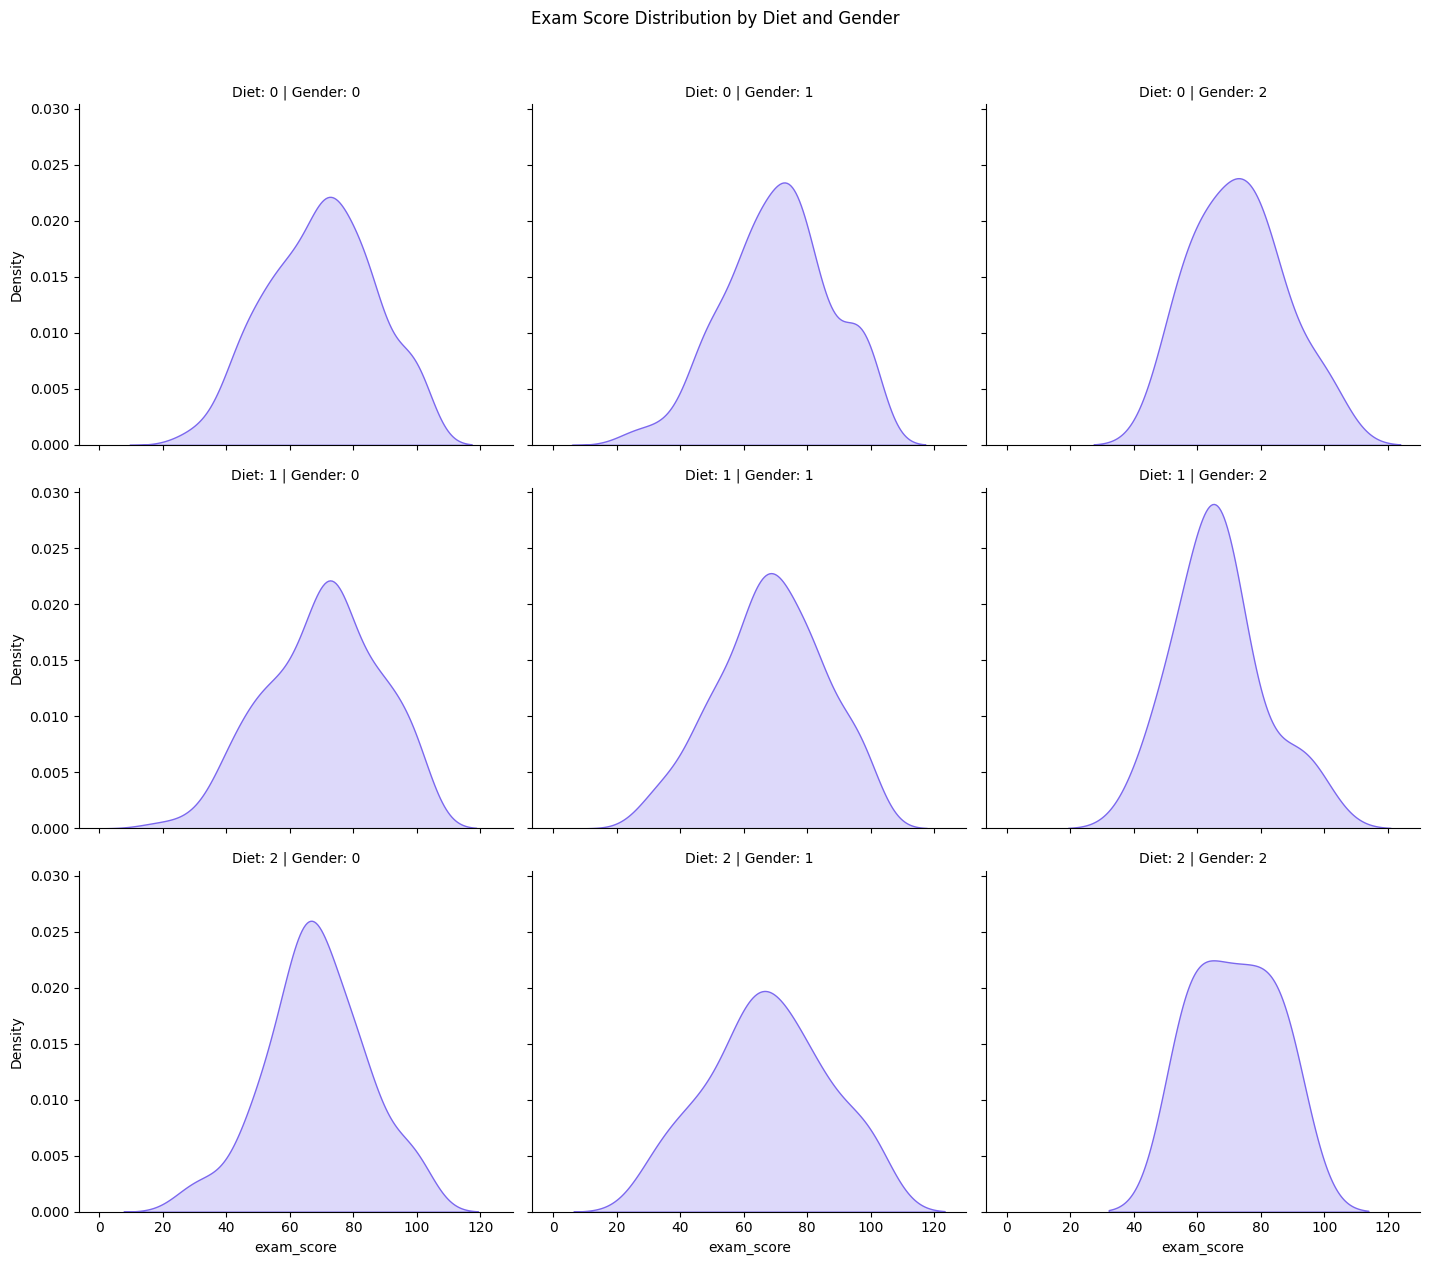

In [60]:
# FacetGrid – Small Multiples of KDE/Box/Scatter
g = sns.FacetGrid(df, row="diet_quality", col="gender", height=4, aspect=1.2)
g.map(sns.kdeplot, "exam_score", fill=True, color='mediumslateblue')
g.set_titles("Diet: {row_name} | Gender: {col_name}")
plt.suptitle("Exam Score Distribution by Diet and Gender", y=1.05)
plt.show()

# **Clustering**

In [61]:
features = [
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'exam_score',
    'mental_health_rating',
    'attendance_percentage'
]
X = df[features]

In [62]:
#KMeans needs features to be standardizzed before use 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [63]:
#KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,random_state = 42)
df['cluster'] = km.fit_predict(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
#Inspect each cluster
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

         study_hours_per_day  sleep_hours  social_media_hours  exam_score  \
cluster                                                                     
0                   4.221307     6.676420            2.493750   82.600568   
1                   2.107781     6.252450            2.702882   52.032565   
2                   4.427907     6.479734            2.291694   74.653821   

         mental_health_rating  attendance_percentage  
cluster                                               
0                    8.099432              84.640909  
1                    4.913545              83.664841  
2                    2.930233              84.074419  


In [66]:
#Rename Labels (Look at each cluster and values associated with it)
cluster_labels = {
    '0': 'High Performer – Balanced Lifestyle',
    '1': 'Low Performer-At Risk',
    '2': 'High Study – Burnout Risk'
}

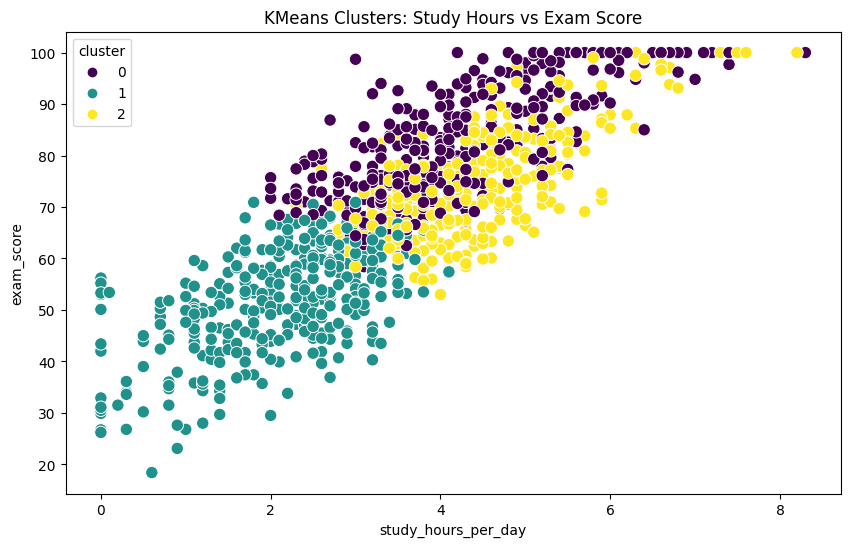

In [67]:
#Visualize study vs exam score using cluster which says lifetsyle of  a student 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='cluster', palette='viridis', s=80)
plt.title("KMeans Clusters: Study Hours vs Exam Score")
plt.show()


In [69]:
for col in num_cols:
    df[col] = ss.fit_transform(df[col].valuesreshape(-1,1))

In [70]:
from sklearn.model_selection import train_test_split
P = df.drop(columns = ['exam_score'])
y = df['exam_score']

In [71]:
X_train,X_test,y_train,y_test = train_test_split(P,y,test_size = 0.2)

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    results[name] = {"R2 Score": r2, "MAE": mae}


In [75]:
results_df = pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)
print(results_df)

                   R2 Score       MAE
Ridge Regression   0.877338  0.260656
Linear Regression  0.877307  0.260727
Gradient Boosting  0.871911  0.270841
SVR                0.843809  0.292776
Random Forest      0.839115  0.295559
Lasso Regression   0.814041  0.319706


***Note:Best R² score shows the most accurate model.
 Lowest MAE = least average prediction error***

***SO THE MODEL IS RIDGE REGRESSION***

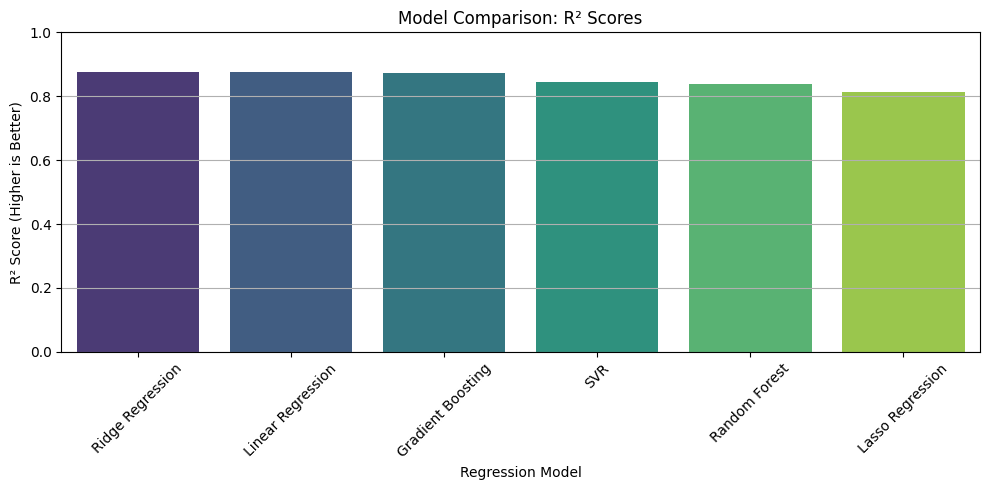

In [76]:
#Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y='R2 Score', data=results_df, palette='viridis')
plt.title("Model Comparison: R² Scores")
plt.ylabel("R² Score (Higher is Better)")
plt.xlabel("Regression Model")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


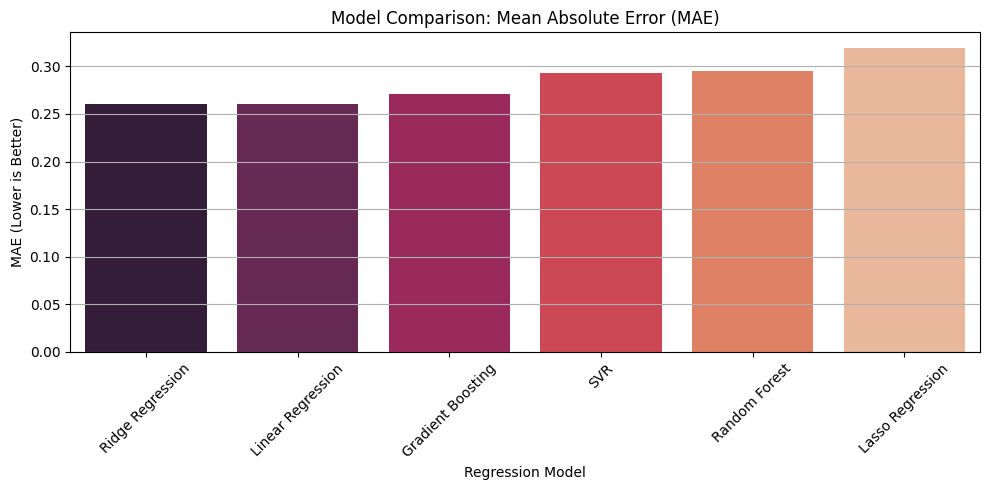

In [77]:
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y='MAE', data=results_df, palette='rocket')
plt.title("Model Comparison: Mean Absolute Error (MAE)")
plt.ylabel("MAE (Lower is Better)")
plt.xlabel("Regression Model")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


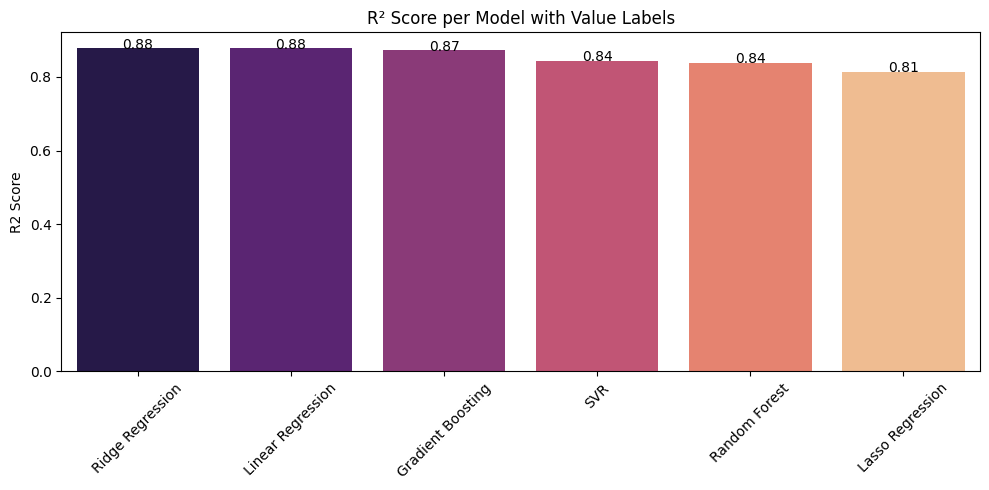

In [78]:
#With values mentioned
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=results_df.index, y='R2 Score', data=results_df, palette='magma')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height() + 0.01), 
                ha='center', va='center')
plt.title("R² Score per Model with Value Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# THANK YOU